## Imports

**THIS PROJECT IS ON MEDICAL IMAGE ANALYSIS USING DEEP LEARNING MODEL, EFFICIENTNET. CLASSIFY THE INPUT HISTOPATHOLOGICAL IMAGE INTO NORMAL OR CANCEROUS**
**bold text**

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


**EFFICIENTNETB0 EFFICIENTNETB1  EFFICIENTNETB2  EFFICIENTNETB3**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# THIS CODE EXECUTED ONLY ONCE TO SPLIT DATA INTO TRAIN VALIDATION AND TEST **SETS**

In [ ]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")
    #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

    root_dir = '*root directory of the dataset folder*'
    classes_dir = ['lung_aca' , 'lung_n', 'lung_scc']

    #for name in data_csv['names'].unique()[:10]:
    #    classes_dir.append(name)

    processed_dir = '*root directory of the dataset folder*'

    val_ratio = 0.20
    test_ratio = 0.20

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/val/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)

## Loading Data

In [ ]:
train_ds = image_dataset_from_directory(directory = 'training dataset directory', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size =IMAGE_SIZE, shuffle = True)
valid_ds = image_dataset_from_directory(directory = 'validation dataset directory', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size = IMAGE_SIZE ,shuffle = False )
test_ds = image_dataset_from_directory(directory = 'test dataset directory', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size = IMAGE_SIZE,shuffle = False)


Found 9016 files belonging to 3 classes.
Found 3006 files belonging to 3 classes.
Found 3006 files belonging to 3 classes.


## Models

### EfficientNetB0

In [ ]:
model0new = tf.keras.applications.EfficientNetB0(weights= None, input_shape=(224, 224, 3), classes=3)
model0new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model0new.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
hist0 = model0new.fit(train_ds, epochs=20, validation_data = valid_ds, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

Epoch 1/20
282/282 [==============================] - 124s 366ms/step - loss: 0.5327 - acc: 0.8149 - val_loss: 8.4450 - val_acc: 0.3327
Epoch 2/20
282/282 [==============================] - 102s 358ms/step - loss: 0.2961 - acc: 0.8939 - val_loss: 0.6406 - val_acc: 0.7089
Epoch 3/20
282/282 [==============================] - 103s 362ms/step - loss: 0.1979 - acc: 0.9226 - val_loss: 0.7112 - val_acc: 0.8017
Epoch 4/20
282/282 [==============================] - 104s 365ms/step - loss: 0.1535 - acc: 0.9425 - val_loss: 0.1724 - val_acc: 0.9401
Epoch 5/20
282/282 [==============================] - 101s 354ms/step - loss: 0.1432 - acc: 0.9505 - val_loss: 0.8476 - val_acc: 0.6820
Epoch 6/20
282/282 [==============================] - 102s 358ms/step - loss: 0.1356 - acc: 0.9462 - val_loss: 0.2010 - val_acc: 0.9205
Epoch 7/20
282/282 [==============================] - 102s 357ms/step - loss: 0.0926 - acc: 0.9653 - val_loss: 0.3340 - val_acc: 0.8752
Epoch 8/20
282/282 [============================

**save the model**

In [ ]:
model0new.save('directory to save model')

load model

In [ ]:
new_model = tf.keras.models.load_model('load saved model')

In [ ]:
test_ds = image_dataset_from_directory(directory = 'test dataset directory ', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size = IMAGE_SIZE,shuffle = False)

Found 3006 files belonging to 3 classes.


In [ ]:
Y_pred = new_model.predict(test_ds)

94/94 [==============================] - 250s 3s/step


In [ ]:
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

array([0, 0, 0, ..., 2, 2, 2])

TESTING OF INVIDUAL IMAGES  BY EFFICIENTNETB0 ALL THREE CLASS OF IMAGES ARE TESTED SUCESSFULLY

In [ ]:
import cv2
#from tensorflow.keras.utils import load_img
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img = image.load_img('test image path', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

1/1 [==============================] - 8s 8s/step


array([2])

In [ ]:
img = image.load_img('load sample image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

1/1 [==============================] - 0s 41ms/step


array([1])

In [ ]:
img = image.load_img('lung aca test image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

1/1 [==============================] - 0s 24ms/step


array([0])

generate labels for valid set


In [ ]:
test_ds = image_dataset_from_directory(directory = '  test dataset directory', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size = IMAGE_SIZE, shuffle = False)

Found 3006 files belonging to 3 classes.


In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
import numpy as np
rounded_labels=np.argmax(true_categories, axis=1)

In [ ]:
rounded_labels

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
Y_pred = model0new.predict(test_ds)
y_pred = np.argmax(Y_pred ,axis =1)

94/94 [==============================] - 14s 137ms/step


In [ ]:
#CHECKING THE CONFUSION MATRIX
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model0new.predict(test_ds)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, y_pred)
print(cm)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(rounded_labels, y_pred, target_names=target_names))

94/94 [==============================] - 12s 131ms/step
Confusion Matrix
[[ 860    2  142]
 [   0 1002    0]
 [  11    0  989]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.86      0.92      1004
           n       1.00      1.00      1.00      1002
         scc       0.87      0.99      0.93      1000

    accuracy                           0.95      3006
   macro avg       0.95      0.95      0.95      3006
weighted avg       0.95      0.95      0.95      3006



**Finding number of images in each category  in test dataset**

In [ ]:
import os
# folder path
dir_path = 'dataset root dirctory'
countaca = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        countaca += 1
print('File count:', countaca)

File count: 1004


In [ ]:
import os
# folder path
dir_path = 'normal image directory'
countaca = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        countaca += 1
print('File count:', countaca)

File count: 1002


In [ ]:
import os
# folder path
dir_path = 'lung scc images directory'
countaca = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        countaca += 1
print('File count:', countaca)

# **confusion matrxi using validation set**

In [ ]:
true_categories = tf.concat([y for x, y in valid_ds], axis=0)
import numpy as np
rounded_labels1=np.argmax(true_categories, axis=1)
Y_pred = new_model.predict(valid_ds)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')


66/66 [==============================] - 133s 2s/step
Confusion Matrix


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels1 , y_pred)
print(cm)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(rounded_labels1, y_pred, target_names=target_names))

In [ ]:
plt.plot(hist0.history['loss'],label = 'train_loss')
plt.plot(hist0.history['val_loss'], label = 'testing_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist0.history['acc'], label = 'train_accuracy')
plt.plot(hist0.history['val_acc'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(['training', 'validation'])
plt.show()

## **### EfficientNetB1**

In [ ]:
model1new = tf.keras.applications.EfficientNetB1(weights=None, input_shape=(224, 224, 3), classes=3)
model1new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
hist1 = model1new.fit(train_ds, epochs=20, validation_data = valid_ds, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

Epoch 1/20
282/282 [==============================] - 2900s 10s/step - loss: 0.6050 - acc: 0.7889 - val_loss: 5.5393 - val_acc: 0.3327
Epoch 2/20
282/282 [==============================] - 140s 491ms/step - loss: 0.2884 - acc: 0.8911 - val_loss: 1.0040 - val_acc: 0.6554
Epoch 3/20
282/282 [==============================] - 140s 493ms/step - loss: 0.2159 - acc: 0.9180 - val_loss: 0.4267 - val_acc: 0.8613
Epoch 4/20
282/282 [==============================] - 139s 491ms/step - loss: 0.1652 - acc: 0.9368 - val_loss: 0.4467 - val_acc: 0.8460
Epoch 5/20
282/282 [==============================] - 140s 492ms/step - loss: 0.1540 - acc: 0.9417 - val_loss: 0.2420 - val_acc: 0.9035
Epoch 6/20
282/282 [==============================] - 139s 490ms/step - loss: 0.1162 - acc: 0.9580 - val_loss: 0.1818 - val_acc: 0.9212
Epoch 7/20
282/282 [==============================] - 140s 494ms/step - loss: 0.0882 - acc: 0.9676 - val_loss: 0.1328 - val_acc: 0.9451
Epoch 8/20
282/282 [=============================

In [ ]:
model1new.save('model driectory')

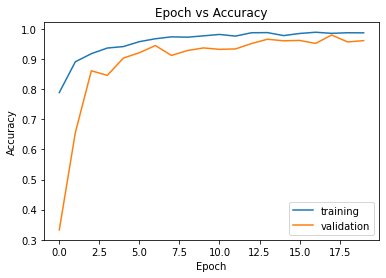

In [ ]:
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(['training', 'validation'])
plt.show()

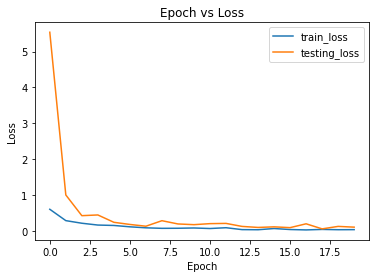

In [ ]:
plt.plot(hist1.history['loss'],label = 'train_loss')
plt.plot(hist1.history['val_loss'], label = 'testing_loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_ds = image_dataset_from_directory(directory = 'lung test dataset', labels='inferred', label_mode='categorical', seed = 69 , batch_size = BATCH_SIZE,image_size = IMAGE_SIZE, shuffle = False)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
import numpy as np
rounded_labels=np.argmax(true_categories, axis=1)



Found 3006 files belonging to 3 classes.


In [ ]:
#CHECKING THE CONFUSION MATRIX
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model1new.predict(test_ds)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, y_pred)
print(cm)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(rounded_labels, y_pred, target_names=target_names))

94/94 [==============================] - 16s 146ms/step
Confusion Matrix
[[ 894    0  110]
 [   1 1001    0]
 [   4    0  996]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.89      0.94      1004
           n       1.00      1.00      1.00      1002
         scc       0.90      1.00      0.95      1000

    accuracy                           0.96      3006
   macro avg       0.96      0.96      0.96      3006
weighted avg       0.97      0.96      0.96      3006



**Testing EfficientNetB1**

In [ ]:
new_model = tf.keras.models.load_model('load models')

In [ ]:
import cv2
#from tensorflow.keras.utils import load_img
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img = image.load_img('load scc test image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

In [ ]:
img = image.load_img('load normal test image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

In [ ]:
img = image.load_img('load aca test image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

EfficientNetB2

In [ ]:
model2new = tf.keras.applications.EfficientNetB2(weights=None, input_shape=(224, 224,3), classes=3)
model2new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#model2new.summary()

In [ ]:
hist2 = model2new.fit(train_ds, epochs=20, validation_data = valid_ds, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

Epoch 1/20
282/282 [==============================] - 163s 529ms/step - loss: 1.0249 - acc: 0.7166 - val_loss: 8.7633 - val_acc: 0.3327
Epoch 2/20
282/282 [==============================] - 145s 513ms/step - loss: 0.3417 - acc: 0.8689 - val_loss: 4.5601 - val_acc: 0.4182
Epoch 3/20
282/282 [==============================] - 142s 501ms/step - loss: 0.2667 - acc: 0.8964 - val_loss: 0.3878 - val_acc: 0.8713
Epoch 4/20
282/282 [==============================] - 142s 499ms/step - loss: 0.2517 - acc: 0.9062 - val_loss: 0.2529 - val_acc: 0.8942
Epoch 5/20
282/282 [==============================] - 143s 506ms/step - loss: 0.1640 - acc: 0.9326 - val_loss: 0.4660 - val_acc: 0.8430
Epoch 6/20
282/282 [==============================] - 144s 509ms/step - loss: 0.1540 - acc: 0.9414 - val_loss: 0.1517 - val_acc: 0.9345
Epoch 7/20
282/282 [==============================] - 146s 514ms/step - loss: 0.1204 - acc: 0.9518 - val_loss: 0.2498 - val_acc: 0.9029
Epoch 8/20
282/282 [============================

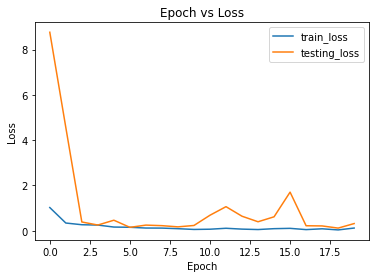

In [ ]:
plt.plot(hist2.history['loss'],label = 'train_loss')
plt.plot(hist2.history['val_loss'], label = 'testing_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

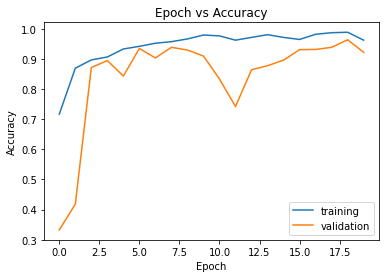

In [ ]:
plt.plot(hist2.history['acc'],label = 'train_acc')
plt.plot(hist2.history['val_acc'],label = 'valid_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model2new.save('model directory')

In [ ]:

import numpy as np
rounded_labels=np.argmax(true_categories, axis=1)


Found 2086 files belonging to 3 classes.


In [ ]:
#CHECKING THE CONFUSION MATRIX
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model2new.predict(test_ds)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, y_pred)
print(cm)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(rounded_labels, y_pred, target_names=target_names))

94/94 [==============================] - 15s 139ms/step
Confusion Matrix
[[ 929   45   30]
 [   0 1002    0]
 [ 145   18  837]]
Classification Report
              precision    recall  f1-score   support

         aca       0.86      0.93      0.89      1004
           n       0.94      1.00      0.97      1002
         scc       0.97      0.84      0.90      1000

    accuracy                           0.92      3006
   macro avg       0.92      0.92      0.92      3006
weighted avg       0.92      0.92      0.92      3006



**Testing of EfficientNetB2**

In [ ]:
new_model = tf.keras.models.load_model('load model')

In [ ]:
import cv2
#from tensorflow.keras.utils import load_img
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img = image.load_img('load lung scc image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

In [ ]:
img = image.load_img('load lung normal image', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

In [ ]:
img = image.load_img('load lung aca images, directory', target_size=(224, 224))
img = np.expand_dims(img, axis=0)
Y_pred = new_model.predict(img)
y_pred = np.argmax(Y_pred ,axis =1)
y_pred

In [ ]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1]+cm[2,2])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9395973154362416
Sensitivity :  1.0
Specificity :  0.9573590096286108


**EfficientNetB3**

In [ ]:
import tensorflow as tf


In [ ]:
model3new = tf.keras.applications.EfficientNetB3(weights=None, input_shape=(224,224, 3), classes=3)
model3new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#model3new.summary()

In [ ]:
hist3 = model3new.fit(train_ds, epochs=20, validation_data = valid_ds, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

Epoch 1/20
282/282 [==============================] - 2132s 7s/step - loss: 1.5602 - acc: 0.6758 - val_loss: 1.8746 - val_acc: 0.3327
Epoch 2/20
282/282 [==============================] - 176s 622ms/step - loss: 0.5862 - acc: 0.8131 - val_loss: 10.8204 - val_acc: 0.6567
Epoch 3/20
282/282 [==============================] - 176s 622ms/step - loss: 0.5015 - acc: 0.8249 - val_loss: 0.5768 - val_acc: 0.7791
Epoch 4/20
282/282 [==============================] - 177s 625ms/step - loss: 0.3544 - acc: 0.8771 - val_loss: 0.2563 - val_acc: 0.9029
Epoch 5/20
282/282 [==============================] - 176s 622ms/step - loss: 0.2937 - acc: 0.9110 - val_loss: 0.1879 - val_acc: 0.9232
Epoch 6/20
282/282 [==============================] - 176s 622ms/step - loss: 0.2162 - acc: 0.9313 - val_loss: 0.4058 - val_acc: 0.9005
Epoch 7/20
282/282 [==============================] - 176s 622ms/step - loss: 0.2134 - acc: 0.9280 - val_loss: 1.1461 - val_acc: 0.8822
Epoch 8/20
282/282 [=============================

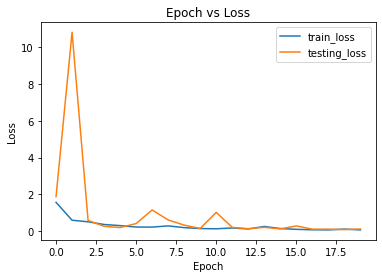

In [ ]:
plt.plot(hist3.history['loss'],label = 'train_loss')
plt.plot(hist3.history['val_loss'], label = 'testing_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

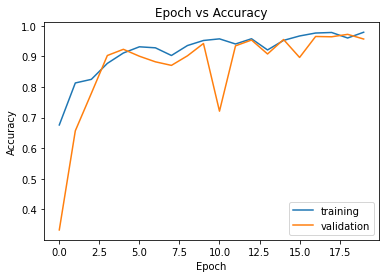

In [ ]:
plt.plot(hist3.history['acc'],label = 'train_acc')
plt.plot(hist3.history['val_acc'],label = 'vaid_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model3new.save('load model')

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
import numpy as np
rounded_labels=np.argmax(true_categories, axis=1)


In [ ]:
#CHECKING THE CONFUSION MATRIX
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model3new.predict(test_ds)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
cm = confusion_matrix(rounded_labels, y_pred)
print(cm)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(rounded_labels, y_pred, target_names=target_names))

94/94 [==============================] - 48s 152ms/step
Confusion Matrix
[[894   1 109]
 [  0 995   7]
 [ 12   0 988]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.89      0.94      1004
           n       1.00      0.99      1.00      1002
         scc       0.89      0.99      0.94      1000

    accuracy                           0.96      3006
   macro avg       0.96      0.96      0.96      3006
weighted avg       0.96      0.96      0.96      3006

